In [50]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
# Load the dataset
df = pd.read_csv('Uncleaned_Ds_jobs.csv')

In [52]:
# Initial dataset overview
print("Initial Data Overview:")
df.head()


Initial Data Overview:


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [54]:
print(f"Missing Values:\n{df.isnull().sum()}")


Missing Values:
index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


In [55]:
print(f"Duplicated Rows: {df.duplicated().sum()}")


Duplicated Rows: 0




# Data Cleaning and Preparation




In [56]:

# Clean Salary Estimate and create salary columns
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'[^\d\-]', '', regex=True)
df['Average Salary'] = df['Salary Estimate'].apply(
    lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) // 2 if '-' in x else int(x)
)


In [57]:
df[['Min Salary', 'Max Salary']] = df['Salary Estimate'].str.split('-', expand=True)
df['Min Salary'] = pd.to_numeric(df['Min Salary'], errors='coerce')
df['Max Salary'] = pd.to_numeric(df['Max Salary'], errors='coerce')
print()

In [58]:

#Clean Salary Range column
df['Salary Estimate'].isnull().sum()


0

In [59]:
df = df.dropna(subset=['Salary Estimate'])
df['Salary Estimate'].isnull().sum()


0

In [60]:

# Extract state information from Location column
df['state'] = df['Location'].str.split(", ").str[-1].str.strip().str.title()


In [61]:

# Map state abbreviations to full names
state_abbr_to_full = {
    'Ny': 'New York', 'Va': 'Virginia', 'Ma': 'Massachusetts', 'Ca': 'California', 
    'Il': 'Illinois', 'Mo': 'Missouri', 'Wa': 'Washington', 'Dc': 'District of Columbia', 
    'Tn': 'Tennessee', 'Tx': 'Texas', 'Pa': 'Pennsylvania', 'Az': 'Arizona', 
    'Wi': 'Wisconsin', 'Ga': 'Georgia', 'Fl': 'Florida', 'Ne': 'Nebraska', 
    'Ks': 'Kansas', 'Nh': 'New Hampshire', 'Nj': 'New Jersey', 'La': 'Louisiana', 
    'Oh': 'Ohio', 'In': 'Indiana', 'Md': 'Maryland', 'Co': 'Colorado', 
    'Ut': 'Utah', 'Or': 'Oregon', 'Mi': 'Michigan', 'Sc': 'South Carolina', 
    'Ms': 'Mississippi', 'Al': 'Alabama', 'Ri': 'Rhode Island', 'Ia': 'Iowa', 
    'Mn': 'Minnesota', 'Ok': 'Oklahoma', 'Ct': 'Connecticut', 'Nc': 'North Carolina', 
    'De': 'Delaware', 'Wv': 'West Virginia'
}
df['state_full'] = df['state'].map(state_abbr_to_full)


In [62]:

#Clean state_full column
df['state_full'].isnull().sum()
df = df.dropna(subset=['state_full'])
df['state_full'].isnull().sum()

0

In [63]:

# Standardize text columns
df['Job Title'] = df['Job Title'].str.strip().str.title()
df['Company Name'] = df['Company Name'].str.strip().str.title()


In [64]:

# Remove irrelevant rows
df = df[~df['state'].isin(['Remote', 'United States'])]



# Feature Engineering


In [65]:



# Extract key skills from job descriptions
def extract_keywords(description):
    keywords = ['Python', 'SQL', 'Machine Learning', 'Data Analysis', 'Tableau', 'Excel', 'Power BI']
    found = [kw for kw in keywords if isinstance(description, str) and kw in description]
    return ", ".join(found)

df['key_skills'] = df['Job Description'].apply(extract_keywords)


In [66]:

# Create a salary range column
df['Salary range'] = pd.cut(
    df['Average Salary'], 
    bins=[50, 100, 150, 200, 271], 
    labels=["Low", "Mid", "High", "Very High"]
)

df['Salary range'].unique()

['High', 'Mid', 'Low', NaN, 'Very High']
Categories (4, object): ['Low' < 'Mid' < 'High' < 'Very High']


# Data Visualization



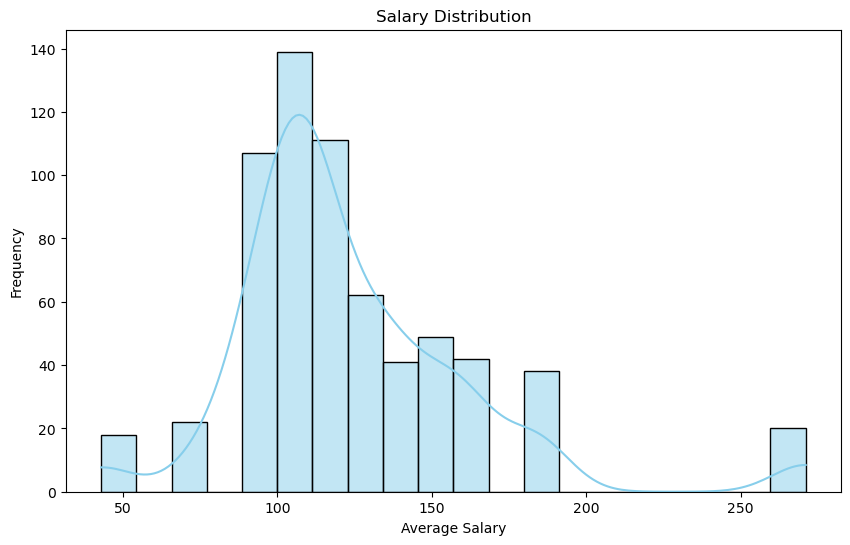

In [67]:

# Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Salary'], kde=True, color="skyblue", bins=20)
plt.title('Salary Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()


C:\Users\Abubakar\AppData\Local\Temp\ipykernel_6364\4160678314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.index, y=top_titles.values, palette="Blues_d")


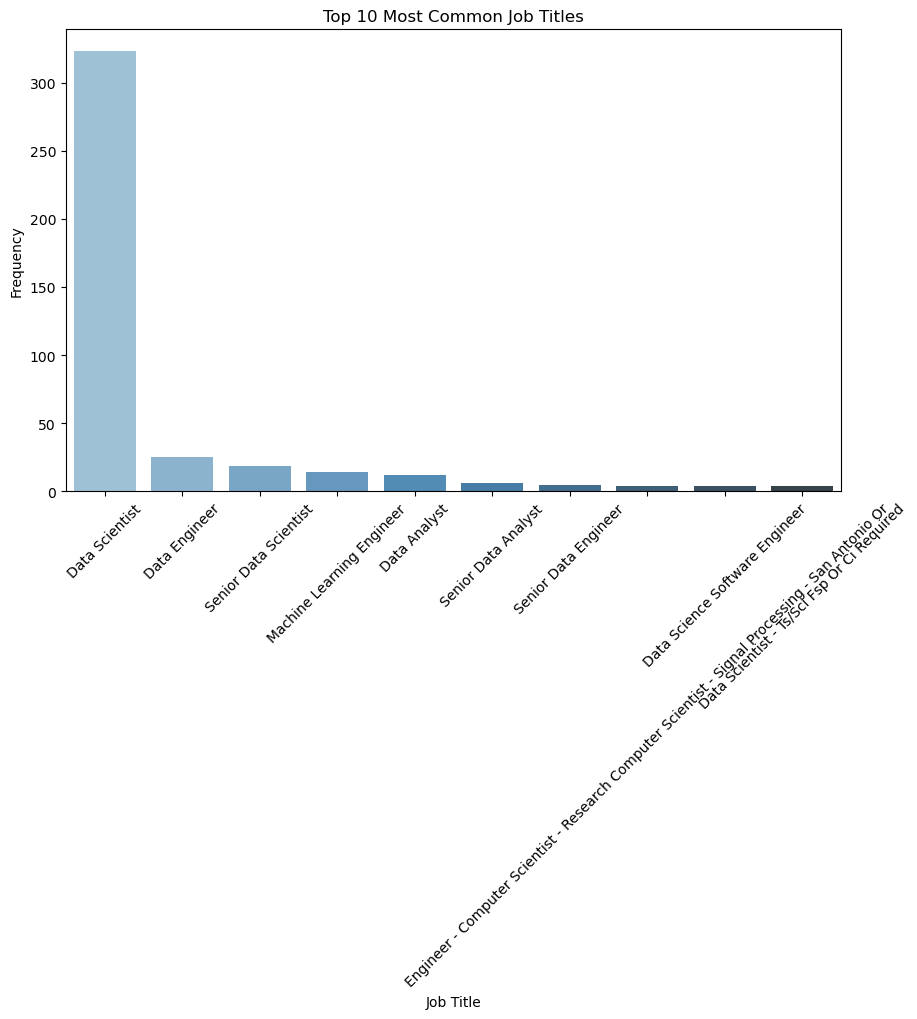

In [68]:

# Top job titles
top_titles = df['Job Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.index, y=top_titles.values, palette="Blues_d")
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


C:\Users\Abubakar\AppData\Local\Temp\ipykernel_6364\852817208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")


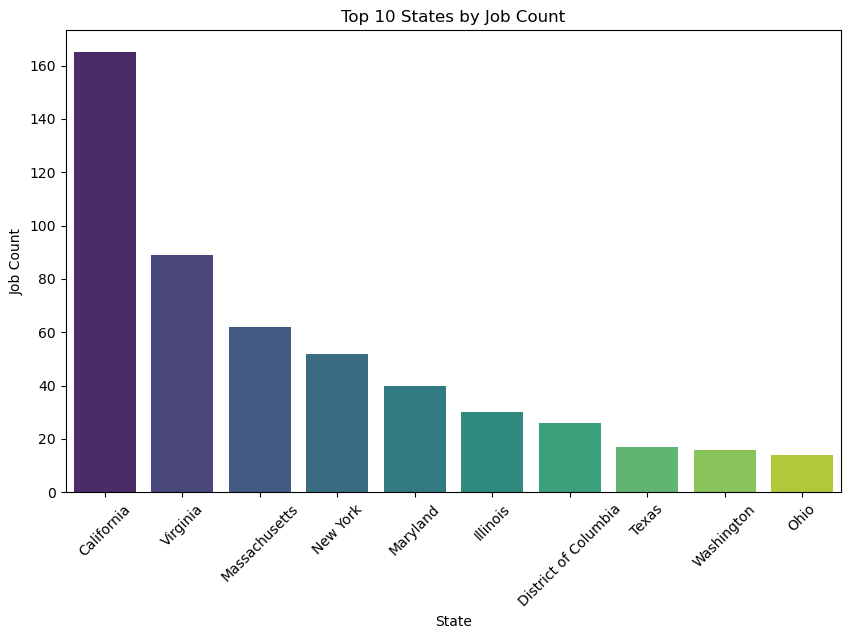

In [69]:

# Top states by job count
top_states = df['state_full'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.title('Top 10 States by Job Count')
plt.xlabel('State')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.show()


In [70]:

# Average salary by state
state_salary = df.groupby('state')['Average Salary'].mean().sort_values(ascending=False).head(10)
print("Top 10 States by Average Salary:")
print(state_salary)


Top 10 States by Average Salary:
state
De    271.000000
Nc    149.888889
Wi    144.333333
Az    140.750000
Ia    140.666667
Dc    139.346154
Ny    136.269231
Tx    135.941176
Wa    134.562500
Ms    133.000000
Name: Average Salary, dtype: float64




# Reorder Columns


In [71]:

column_order = [
    'Job Title', 'Job Description', 'key_skills',       
    'Salary Estimate', 'Average Salary', 'Salary range', 'Min Salary', 'Max Salary', 
    'Company Name', 'Location', 'state', 'state_full',  
    'Headquarters', 'Size', 'Founded', 'Sector', 'Revenue', 'Competitors',  
    'Rating'
]

df = df[column_order]


In [72]:

# Final dataset overview
print("Final Data Overview:")
df.head()


Final Data Overview:


,Job Title,Job Description,key_skills,Salary Estimate,Average Salary,Salary range,Min Salary,Max Salary,Company Name,Location,state,state_full,Headquarters,Size,Founded,Sector,Revenue,Competitors,Rating
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,,137-171,154,High,137,171,Healthfirst\n3.1,"New York, NY",Ny,New York,"New York, NY",1001 to 5000 employees,1993,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",3.1
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",SQL,137-171,154,High,137,171,Mantech\n4.2,"Chantilly, VA",Va,Virginia,"Herndon, VA",5001 to 10000 employees,1968,Business Services,$1 to $2 billion (USD),-1,4.2
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,"Python, Excel",137-171,154,High,137,171,Analysis Group\n3.8,"Boston, MA",Ma,Massachusetts,"Boston, MA",1001 to 5000 employees,1981,Business Services,$100 to $500 million (USD),-1,3.8
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,"SQL, Machine Learning",137-171,154,High,137,171,Inficon\n3.5,"Newton, MA",Ma,Massachusetts,"Bad Ragaz, Switzerland",501 to 1000 employees,2000,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",3.5
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,"Python, SQL, Excel",137-171,154,High,137,171,Affinity Solutions\n2.9,"New York, NY",Ny,New York,"New York, NY",51 to 200 employees,1998,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",2.9


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 0 to 671
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Job Title        649 non-null    object  
 1   Job Description  649 non-null    object  
 2   key_skills       649 non-null    object  
 3   Salary Estimate  649 non-null    object  
 4   Average Salary   649 non-null    int64   
 5   Salary range     631 non-null    category
 6   Min Salary       649 non-null    int64   
 7   Max Salary       649 non-null    int64   
 8   Company Name     649 non-null    object  
 9   Location         649 non-null    object  
 10  state            649 non-null    object  
 11  state_full       649 non-null    object  
 12  Headquarters     649 non-null    object  
 13  Size             649 non-null    object  
 14  Founded          649 non-null    int64   
 15  Sector           649 non-null    object  
 16  Revenue          649 non-null    object  
 17  Co